## Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Read & Inspect Data

Data retrieved from https://huggingface.co/datasets/lukebarousse/data_jobs

In [3]:
df_jobs = pd.read_csv('/Users/leohermansson/Documents/Python for Data Analytics - Luke Barousse/data_jobs.csv')

In [4]:
df_jobs.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [5]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [6]:
df_jobs['job_posted_date'] = pd.to_datetime(df_jobs['job_posted_date']).copy()

In [7]:
df_jobs_sweden = df_jobs[df_jobs['job_country']=='Sweden'].copy()

## Visualizations

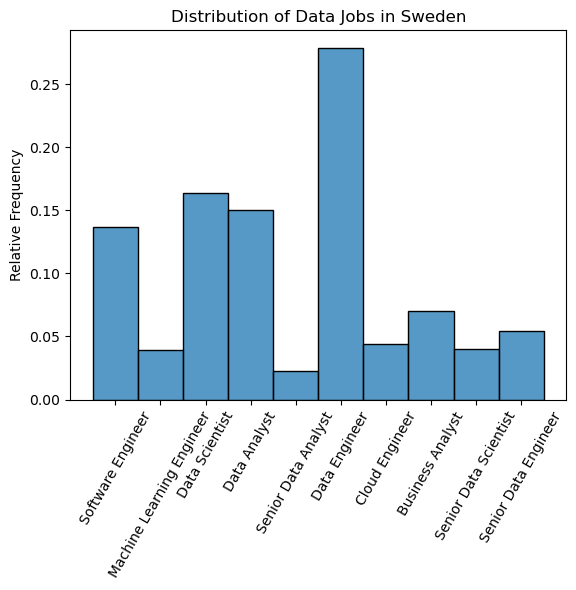

In [8]:
sns.histplot(data=df_jobs_sweden, x='job_title_short', stat='probability')
plt.xticks(rotation=60)

plt.xlabel('')
plt.ylabel('Relative Frequency')
plt.title('Distribution of Data Jobs in Sweden')
plt.show()

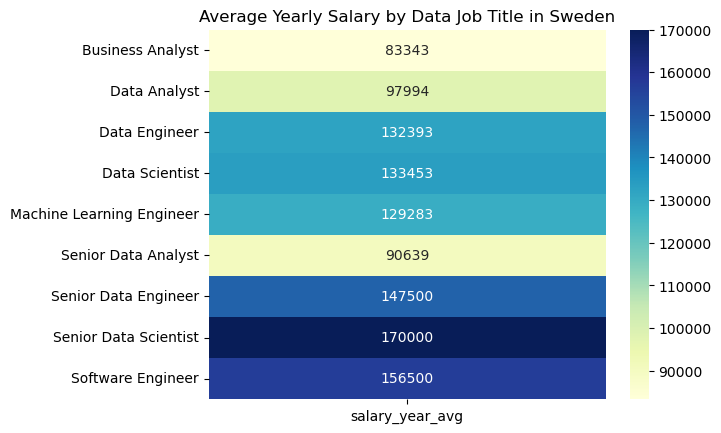

In [9]:
pivot_table = df_jobs_sweden.pivot_table(
    index='job_title_short',
    values='salary_year_avg',
    aggfunc='mean'
)

sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Yearly Salary by Data Job Title in Sweden")
plt.ylabel("")
plt.xlabel("")
plt.show()

In [152]:
postings = df_jobs_sweden.set_index('job_posted_date').resample('ME').size().reset_index(name='num_postings')
postings

,job_posted_date,num_postings
0,2023-01-31,780
1,2023-02-28,545
2,2023-03-31,459
3,2023-04-30,519
4,2023-05-31,381
5,2023-06-30,410
6,2023-07-31,671
7,2023-08-31,866
8,2023-09-30,413
9,2023-10-31,408


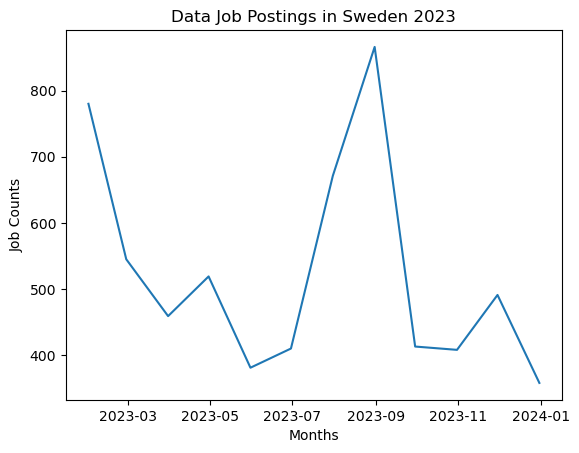

In [154]:
sns.lineplot(data=postings, x='job_posted_date', y='num_postings')

plt.title('Data Job Postings in Sweden 2023')
plt.xlabel('Months')
plt.ylabel('Job Counts')
plt.show()

In [147]:
data_science_sweden_jobs = df_jobs_sweden[df_jobs_sweden['job_title_short']=='Data Scientist']
monthly_postings = data_science_sweden_jobs.set_index('job_posted_date').resample('ME').size().reset_index(name='num_postings')
monthly_postings

,job_posted_date,num_postings
0,2023-01-31,152
1,2023-02-28,92
2,2023-03-31,66
3,2023-04-30,97
4,2023-05-31,65
5,2023-06-30,59
6,2023-07-31,100
7,2023-08-31,128
8,2023-09-30,62
9,2023-10-31,60


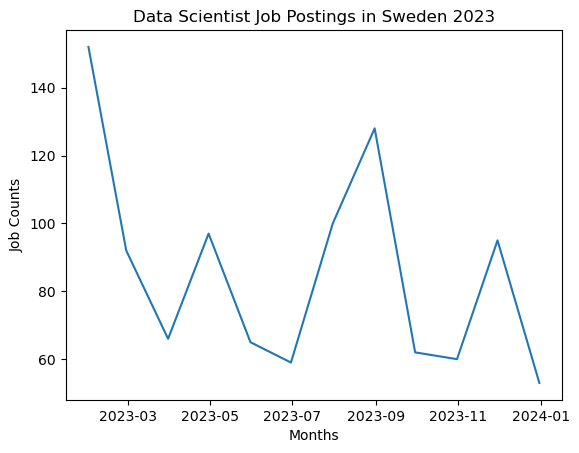

In [11]:
sns.lineplot(data=monthly_postings, x='job_posted_date', y='num_postings')

plt.title('Data Scientist Job Postings in Sweden 2023')
plt.xlabel('Months')
plt.ylabel('Job Counts')
plt.show()

In [13]:
location_counts = df_jobs_sweden['job_location'].value_counts().reset_index()
location_counts_10 = location_counts.head(10)
location_counts_10

,job_location,count
0,"Stockholm, Sweden",3241
1,Sweden,775
2,"Gothenburg, Sweden",585
3,"Malmö, Sweden",326
4,"Solna, Sweden",323
5,Anywhere,290
6,"Lund, Sweden",118
7,"Södertälje, Sweden",62
8,"Helsingborg, Sweden",33
9,"Linköping, Sweden",28


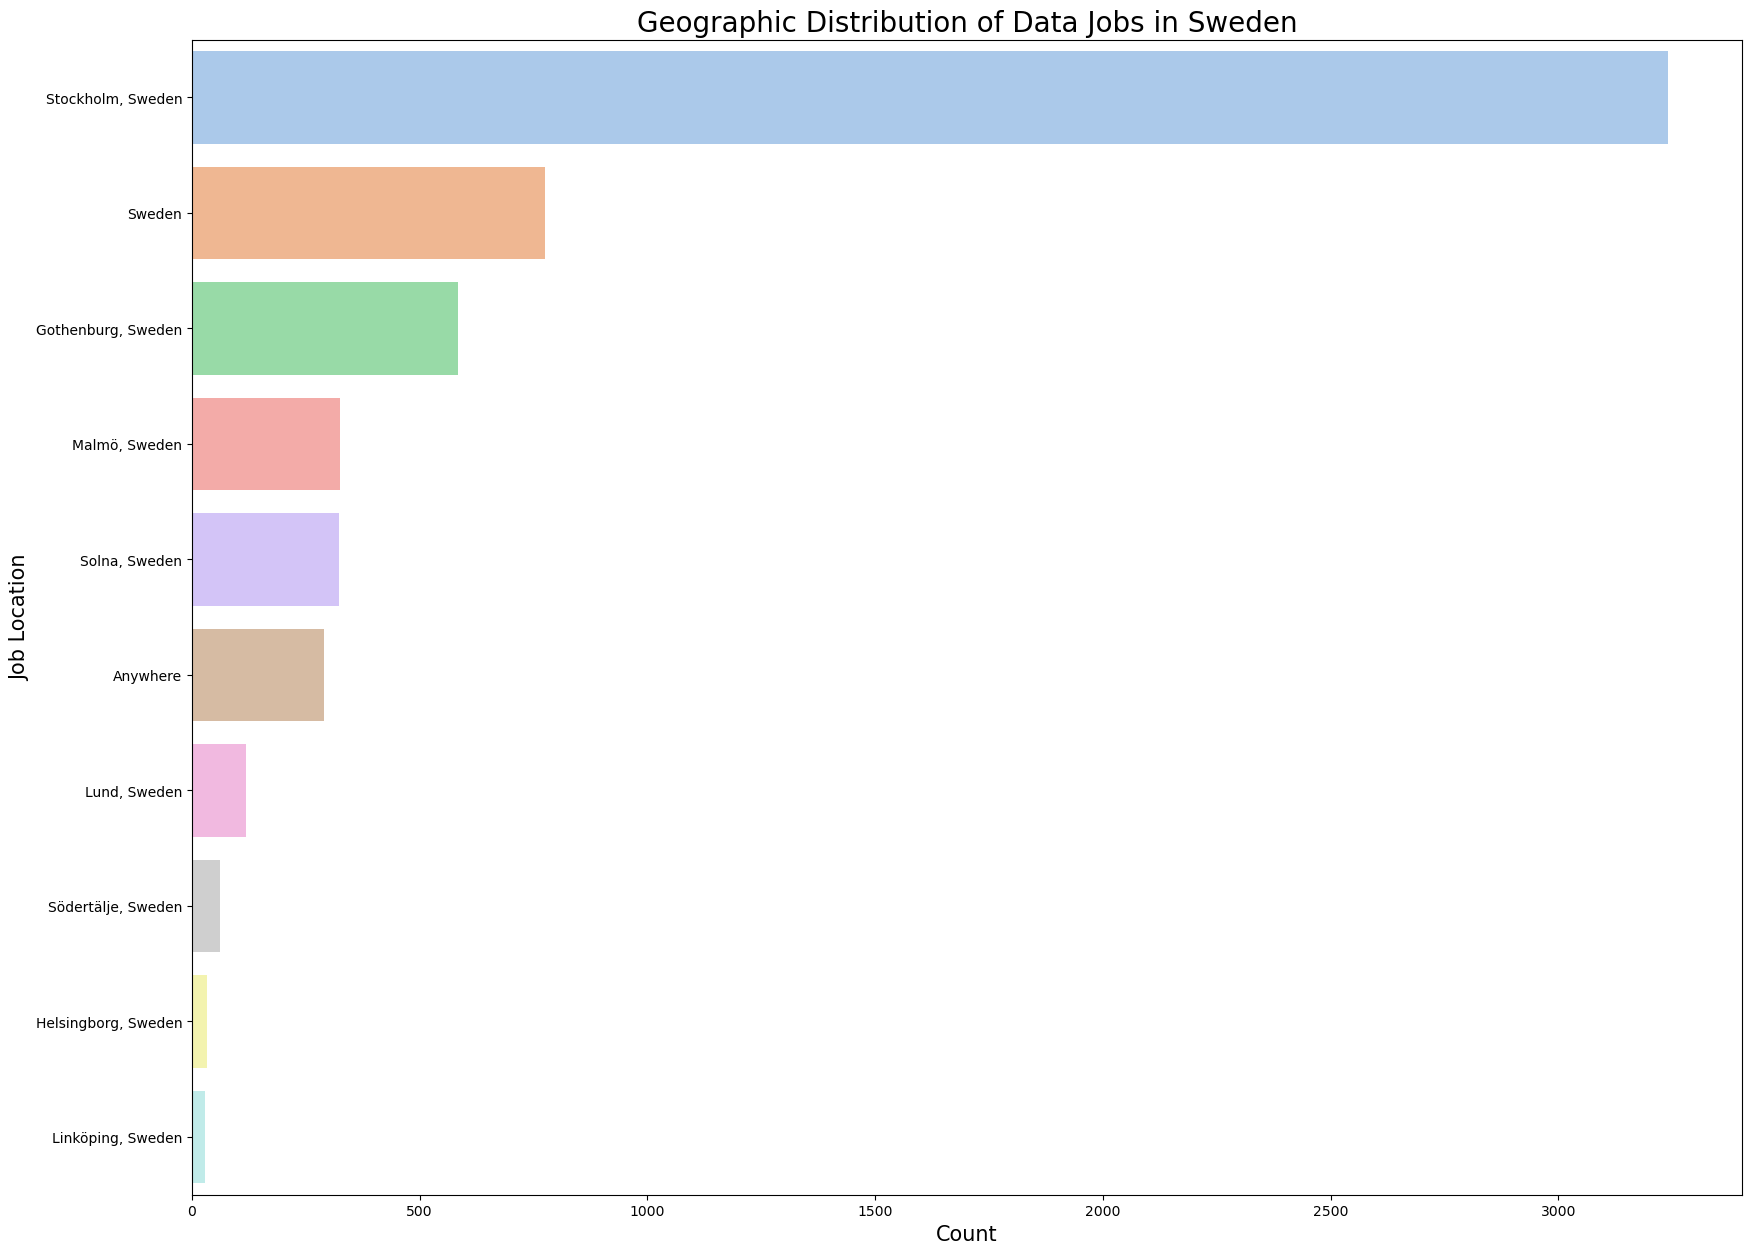

In [100]:
plt.figure(figsize=(20,15))
sns.barplot(data=location_counts_10, x='count', y='job_location', orient='h', palette='pastel', hue='job_location')

plt.title('Geographic Distribution of Data Jobs in Sweden', fontsize=20)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Job Location', fontsize=15)
plt.show()

## Highest Demand Skills

In [52]:
import ast

df_jobs_sweden['job_skills'] = df_jobs_sweden['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

In [54]:
df_jobs_sweden['job_skills'] = df_jobs_sweden['job_skills'].apply(
    lambda x: x if isinstance(x, list) else []
)

In [56]:
df_skills_exploded = df_jobs_sweden.explode('job_skills')
skill_salary = df_skills_exploded.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False)
skill_counts = df_skills_exploded['job_skills'].value_counts()

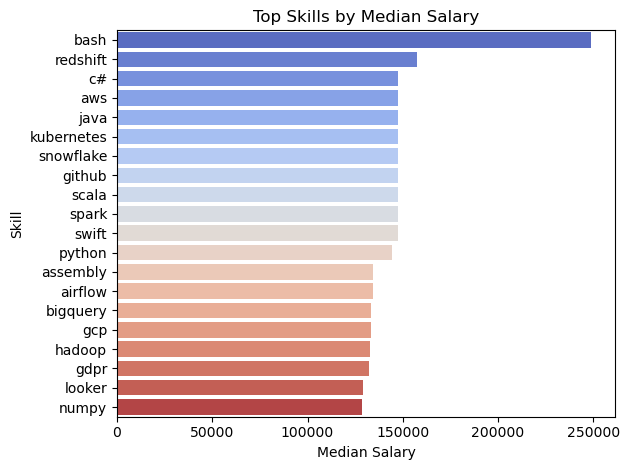

In [90]:
top_skills = skill_salary.head(20).reset_index()
sns.barplot(data=top_skills, x='salary_year_avg', y='job_skills', palette='coolwarm', hue='job_skills')
plt.title("Top Skills by Median Salary")
plt.xlabel("Median Salary")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

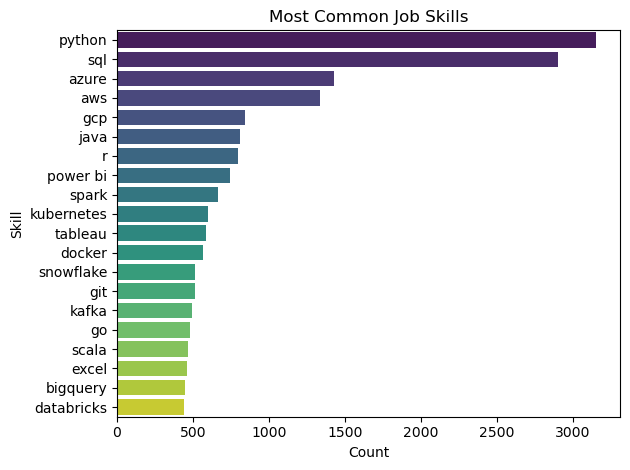

In [92]:
top_counts = skill_counts.head(20).reset_index()
top_counts.columns = ['job_skills', 'count']

sns.barplot(data=top_counts, x='count', y='job_skills', palette='viridis', hue='job_skills')
plt.title("Most Common Job Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()